In [1]:
%matplotlib widget


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *


## 读取 Lenna 图像并进行傅里叶变换

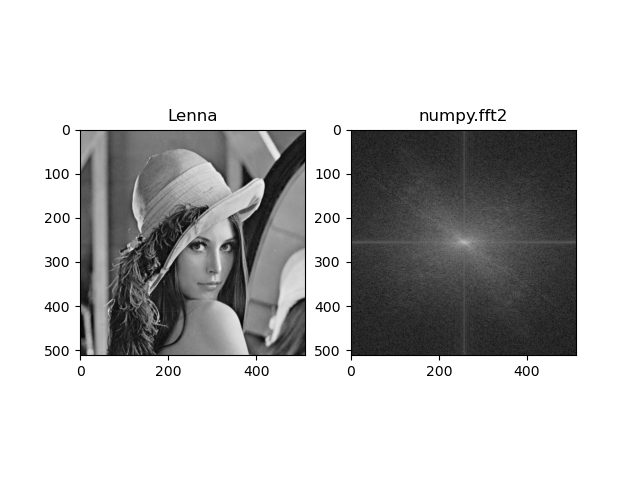

In [5]:
img = cv2.imread('Lenna.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_fft = abs(fftshift(fft2(gray)))

plt.subplot(1,2,1)
plt.title('Lenna')
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title('numpy.fft2')
plt.imshow(np.log(1+gray_fft), cmap='gray', vmin=5)
plt.show()

## 添加水印并进行傅里叶逆变换

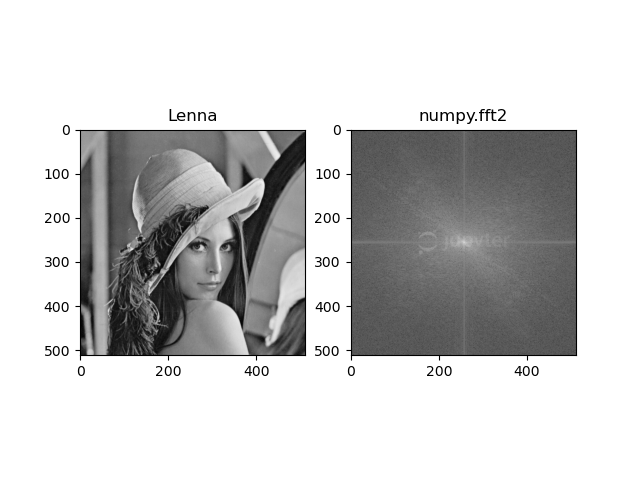

In [8]:
logo = cv2.imread('logo.png', cv2.IMREAD_COLOR)
gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
# 将 logo 按 fft 的大小填充
gray_logo = np.pad(gray_logo, ((0, gray_fft.shape[0] - gray_logo.shape[0]), (0, gray_fft.shape[1] - gray_logo.shape[1])), 'constant', constant_values=0)
# 将 logo 中心对称
# TODO
logo_fft = np.log(1+gray_fft) + gray_logo / 100

plt.imshow(logo_fft, cmap='gray')
plt.show()